



*   Nama : Davin Jonathan Sitindaon
*   Nim : 23.11.5759
*   Kelas : IF07


# **PROFILE DATASET**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/faang_stock_prices.csv')
df.head()

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  object 
 1   Ticker           14964 non-null  object 
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7

In [ ]:
print("Jumlah data:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah data: 14964
Jumlah kolom: 19


# **Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Volume,0
SMA_7,0
SMA_21,0
EMA_12,0


In [ ]:
df = df.fillna('')

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df['High']
y = df['Low']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
label_encoder.classes_

array([7.46412921e-01, 7.59096900e-01, 7.59904258e-01, ...,
       7.72208561e+02, 7.77071358e+02, 7.79657506e+02])

# **EXPLORATORY DATA ANALYSIS**

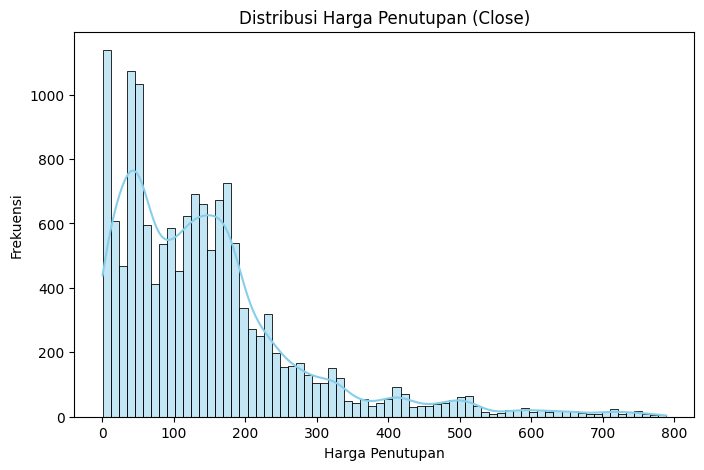

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], kde=True, color='skyblue')
plt.title("Distribusi Harga Penutupan (Close)")
plt.xlabel("Harga Penutupan")
plt.ylabel("Frekuensi")
plt.show()

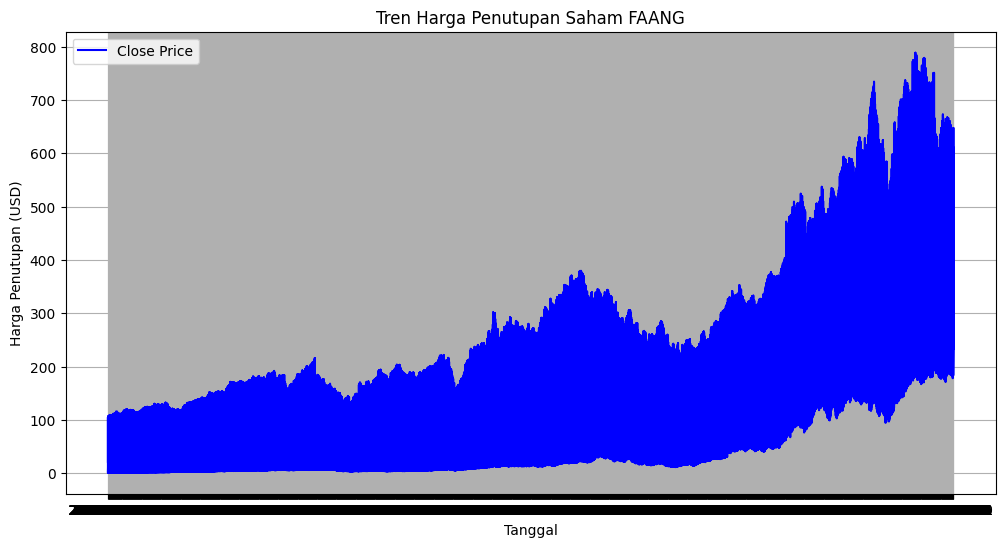

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title("Tren Harga Penutupan Saham FAANG")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan (USD)")
plt.legend()
plt.grid(True)
plt.show()

# **SELEKSI FITUR**

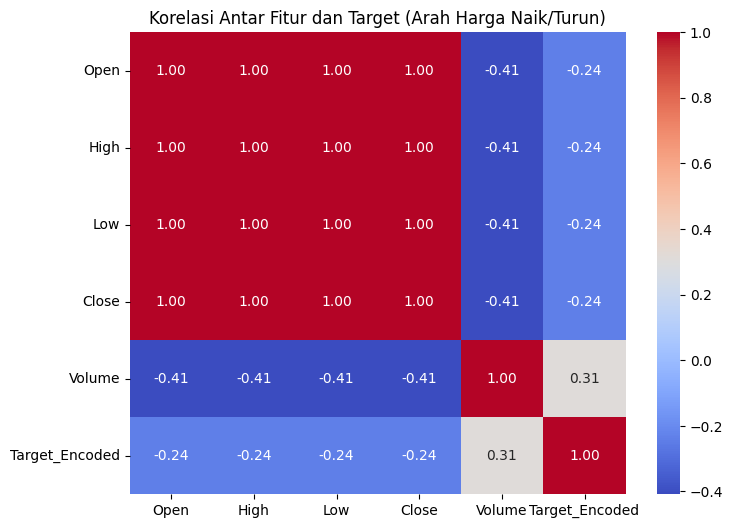

Korelasi fitur terhadap target:
Target_Encoded    1.000000
Volume            0.307098
Low              -0.242136
Open             -0.242298
Close            -0.242587
High             -0.243053
Name: Target_Encoded, dtype: float64


In [ ]:
df['Price_Change'] = df['Close'].diff()
df['Target'] = df['Price_Change'].apply(lambda x: 'Naik' if x > 0 else 'Turun')

le = LabelEncoder()
df['Target_Encoded'] = le.fit_transform(df['Target'])

features = ['Open', 'High', 'Low', 'Close', 'Volume']

corr_matrix = df[features + ['Target_Encoded']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur dan Target (Arah Harga Naik/Turun)")
plt.show()

print("Korelasi fitur terhadap target:")
print(corr_matrix['Target_Encoded'].sort_values(ascending=False))

# **MODELING**

===== Evaluasi Model Logistic Regression =====
Akurasi : 0.4330103575008353

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.42      1.00      0.59      1223
           1       1.00      0.04      0.08      1770

    accuracy                           0.43      2993
   macro avg       0.71      0.52      0.33      2993
weighted avg       0.76      0.43      0.29      2993



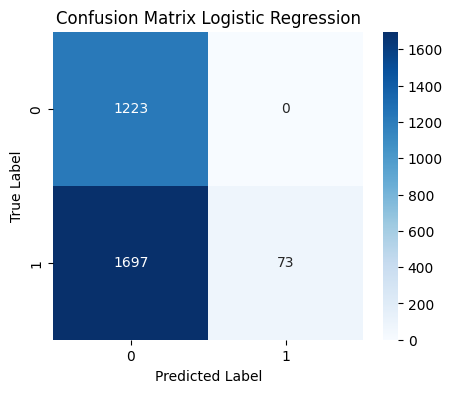

In [ ]:
df['Price_Change'] = df['Close'].diff()
df['Target'] = df['Price_Change'].apply(lambda x: 'Naik' if x > 0 else 'Turun')


le = LabelEncoder()
df['Target_Encoded'] = le.fit_transform(df['Target'])  # Naik = 1, Turun = 0

X = df[['Open', 'High', 'Low', 'Close']]
y = df['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("===== Evaluasi Model Logistic Regression =====")
print("Akurasi :", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'faang_logistic_model.pkl')
joblib.dump(scaler, 'faang_scaler.pkl')



['faang_scaler.pkl']

# **EVALUASI MODEL**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.4330103575008353
              precision    recall  f1-score   support

        Naik       0.42      1.00      0.59      1223
       Turun       1.00      0.04      0.08      1770

    accuracy                           0.43      2993
   macro avg       0.71      0.52      0.33      2993
weighted avg       0.76      0.43      0.29      2993

